In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import pw

In [2]:
# Create database connection 

connection_string = f"postgres:{pw}@localhost:5432/beer_db"

engine = create_engine(f'postgres://{connection_string}')

In [3]:
data = pd.read_sql_query('select * from beerdata as b inner join locationdata as l on l.brewery_name = b.brewery_name', con=engine)

In [4]:
data.tail()

,beer_name,beer_id,brewery_name,brewery_id,beer_style,cluster_group,beer_abv,overall_review,aroma_review,appearance_review,palate_review,taste_review,id,City,State,brewery_name,Country,Latitude,Longitude,id
215275,Back Yard India Pale Ale,1599,Cooperstown Brewing Company,60,English India Pale Ale (IPA),0,6.1,3.481818,3.340909,3.777273,3.440909,3.35,616,Milford,New York,Cooperstown Brewing Company,United States,42.5893,-74.9403,5333
215276,Back Yard India Pale Ale,1599,Cooperstown Brewing Company,60,English India Pale Ale (IPA),0,6.1,3.481818,3.340909,3.777273,3.440909,3.35,616,Milford,New York,Cooperstown Brewing Company,United States,42.5893,-74.9403,4167
215277,Back Yard India Pale Ale,1599,Cooperstown Brewing Company,60,English India Pale Ale (IPA),0,6.1,3.481818,3.340909,3.777273,3.440909,3.35,616,Milford,New York,Cooperstown Brewing Company,United States,42.5893,-74.9403,3001
215278,Back Yard India Pale Ale,1599,Cooperstown Brewing Company,60,English India Pale Ale (IPA),0,6.1,3.481818,3.340909,3.777273,3.440909,3.35,616,Milford,New York,Cooperstown Brewing Company,United States,42.5893,-74.9403,1835
215279,Back Yard India Pale Ale,1599,Cooperstown Brewing Company,60,English India Pale Ale (IPA),0,6.1,3.481818,3.340909,3.777273,3.440909,3.35,616,Milford,New York,Cooperstown Brewing Company,United States,42.5893,-74.9403,669


In [5]:
beer = data[['brewery_name','beer_name','beer_style', 'cluster_group', 'beer_abv', 'overall_review', 'aroma_review', 'appearance_review',
               'palate_review', 'taste_review', 'City', 'State', 'Country', 'Latitude', 'Longitude']]

In [6]:
beer.head(2)

,brewery_name,brewery_name,beer_name,beer_style,cluster_group,beer_abv,overall_review,aroma_review,appearance_review,palate_review,taste_review,City,State,Country,Latitude,Longitude
0,Cooperstown Brewing Company,Cooperstown Brewing Company,Benchwarmer Porter,English Porter,0,6.3,3.858779,3.751908,3.858779,3.683206,3.881679,Milford,New York,United States,42.5893,-74.9403
1,Cooperstown Brewing Company,Cooperstown Brewing Company,Benchwarmer Porter,English Porter,0,6.3,3.858779,3.751908,3.858779,3.683206,3.881679,Milford,New York,United States,42.5893,-74.9403


In [7]:
# drop duplicate beers
beer_df = beer.drop_duplicates(["beer_name"])

In [8]:
# drop duplicate cols
beer_df = beer_df.T.drop_duplicates().T

In [9]:
# create function to convert necessary objects to floats
def data_convert(col_names,to_type):
    for col in col_names:
        beer_df[col] = beer_df[col].astype(to_type)


In [10]:
# convert necessary cols to floats
data_convert(["cluster_group", "beer_abv", "overall_review", "aroma_review", "appearance_review", "palate_review", "taste_review",
             "Latitude", "Longitude"], "float")

In [11]:
beer_df.to_csv("data/beer_merge.csv")

In [12]:
beer_df.head(2)

,brewery_name,beer_name,beer_style,cluster_group,beer_abv,overall_review,aroma_review,appearance_review,palate_review,taste_review,City,State,Country,Latitude,Longitude
0,Cooperstown Brewing Company,Benchwarmer Porter,English Porter,0.0,6.3,3.858779,3.751908,3.858779,3.683206,3.881679,Milford,New York,United States,42.5893,-74.9403
5,Cooperstown Brewing Company,Striker,American Brown Ale,60.0,NaN,3.705882,3.705882,3.676471,3.588235,3.529412,Milford,New York,United States,42.5893,-74.9403


In [13]:
avg_abv_state = beer_df.groupby("State")["beer_abv"].mean()

In [14]:
roygbiv = ["maroon", "red", "orange", "yellow", "green", "limegreen", "blue", "indigo", "violet", "pink"]
color_bar = ["limegreen", "blue","orange"]

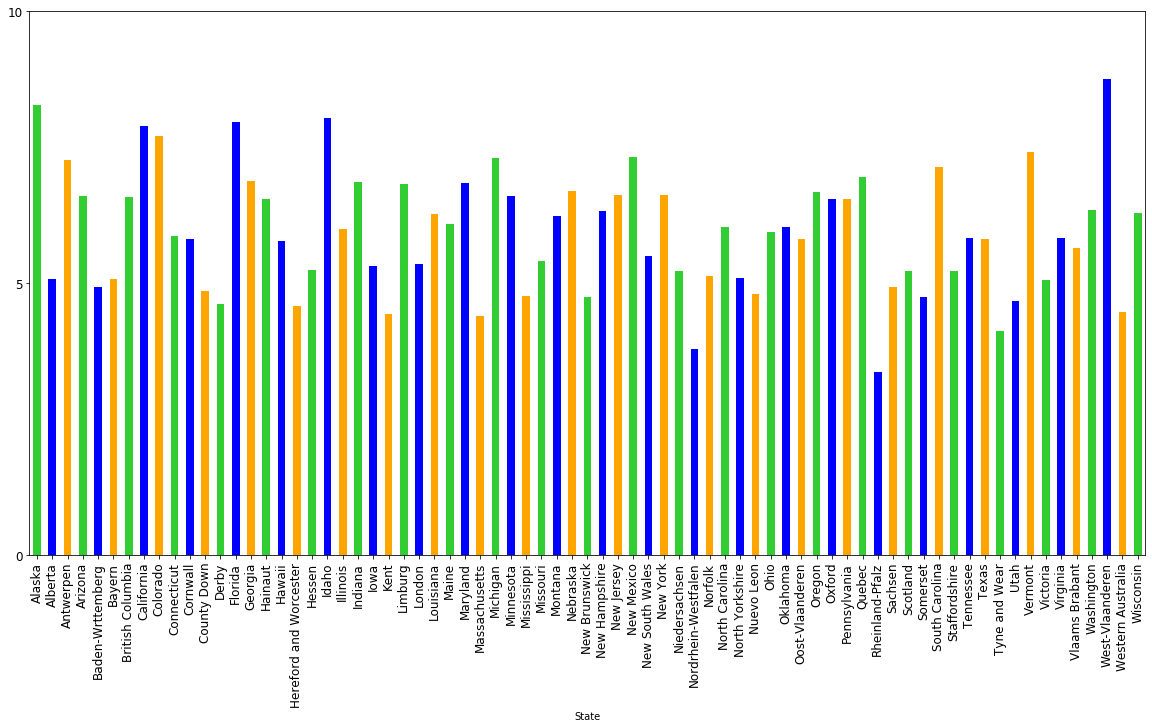

In [15]:
bar_chart = avg_abv_state.plot(kind="bar", color=color_bar, alpha=1, align="center", fontsize=12, figsize=(20,10), yticks=range(0,15,5))
plt.savefig("images/abv_state_bar.png")

In [16]:
new_df = beer_df.dropna() 

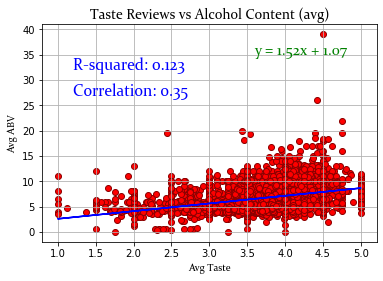

In [17]:
# Calculate the correlation coefficient and linear regression model 
import scipy.stats as st
from scipy.stats import linregress

avg_abv = new_df.groupby("beer_name")["beer_abv"].mean()
avg_taste = new_df.groupby("beer_name")["taste_review"].mean()


# Add the linear regression equation and line to plot
slope, intercept, rvalue, pvalue, stderr = linregress(avg_taste, avg_abv)
regress_values = avg_taste * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = f'Correlation: {round(st.pearsonr(avg_taste, avg_abv)[0],2)}'
r2 = f'R-squared: {round(rvalue**2,3)}'
plt.scatter(avg_taste, avg_abv, marker="o", facecolors="red", edgecolors="darkred", alpha=1)
plt.plot(avg_taste,regress_values,"b-")
plt.annotate(line_eq,(3.6,35),fontsize=15,color="green", fontname="Constantia")
plt.annotate(correlation,(1.2,27),fontsize=16, color ="blue", fontname="Constantia")
plt.annotate(r2,(1.2,32),fontsize=16, color ="blue", fontname="Constantia")

plt.title("Taste Reviews vs Alcohol Content (avg)", fontsize=14, fontname="Constantia")
plt.ylabel("Avg ABV", fontname="Constantia")
plt.xlabel("Avg Taste", fontname="Constantia")
plt.grid(True)
plt.savefig("images/scatter_taste_abv.png")
plt.show()

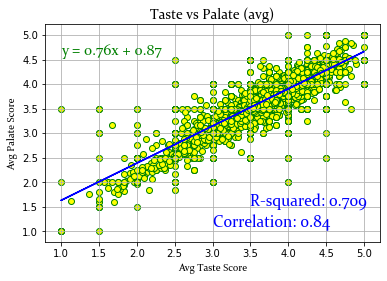

In [18]:
avg_palate = new_df.groupby("beer_name")["palate_review"].mean()
avg_taste = new_df.groupby("beer_name")["taste_review"].mean()


# Add the linear regression equation and line to plot
slope, intercept, rvalue, pvalue, stderr = linregress(avg_taste, avg_palate)
regress_values = avg_taste * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = f'Correlation: {round(st.pearsonr(avg_taste, avg_palate)[0],2)}'
r2 = f'R-squared: {round(rvalue**2,3)}'
plt.scatter(avg_taste, avg_palate, marker="o", facecolors="yellow", edgecolors="green", alpha=1)
plt.plot(avg_taste,regress_values,"b-")
plt.annotate(line_eq,(1,4.6),fontsize=15,color="green", fontname="Constantia")
plt.annotate(correlation,(3,1.1),fontsize=16, color ="blue", fontname="Constantia")
plt.annotate(r2,(3.5,1.5),fontsize=16, color ="blue", fontname="Constantia")

plt.title("Taste vs Palate (avg)", fontsize=14, fontname="Constantia")
plt.ylabel("Avg Palate Score", fontname="Constantia")
plt.xlabel("Avg Taste Score", fontname="Constantia")
plt.grid(True)
plt.savefig("images/scatter_taste_palate.png")
plt.show()

In [19]:
# Find the rows with the maximum overall reviews
max_beers = pd.read_sql_query('Select beer_name, MAX(overall_review) AS top_overall from beerdata group by beer_name order by top_overall DESC Limit 615', con=engine)


In [20]:
max_beers

,beer_name,top_overall
0,Ziguljovskoje Helles Bier,5.0
1,Yokohama Hefeweizen,5.0
2,Zamboni Black Ice,5.0
3,Workshop Hefeweizen,5.0
4,Yazmin IPA,5.0
...,...,...
610,Dick's Kolsch,5.0
611,Divine Vamp 3,5.0
612,Batch 1092,5.0
613,Distorter Porter,5.0


In [21]:
import plotly.express as px

fig = px.scatter_3d(new_df, x='overall_review', y='beer_abv', z='taste_review',
              color='beer_style', size='beer_abv', size_max=25,
              symbol='aroma_review', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=10, r=0, b=0, t=10))
fig.write_html("images/3Dscatter.html")